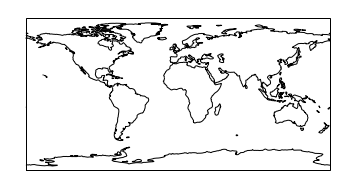

In [11]:
import pandas as pd

frame = pd.read_json('C:\Work\LYIT\Big_Data_Analytics\Data\ZIP_code_stats.json', lines=True)
geo_complaints = frame.fillna(0)
geo_complaints.head()

,BankAccount,City,CreditService,DebtCollection,Latitude,Loans,Longitude,NonBank,NumReturns,State,TotalIncome,Transfers,ZIP code,Zip,zipcode
0,2.0,Conroe,15.0,1.0,30.368543,0.0,-95.40217,0.0,7810,TX,371681,0.0,77303,77303,77303
1,4.0,Princeton,0.0,1.0,45.576431,0.0,-93.57644,0.0,7930,MN,453468,0.0,55371,55371,55371
2,0.0,San Elizario,0.0,3.0,31.577344,0.0,-106.26720,0.0,5390,TX,139911,0.0,79849,79849,79849
3,19.0,Niles,4.0,11.0,41.186257,2.0,-80.75297,0.0,10150,OH,396741,0.0,44446,44446,44446
4,48.0,Lynbrook,22.0,27.0,40.656974,3.0,-73.67306,1.0,11520,NY,1028777,1.0,11563,11563,11563


In [16]:
continental_us_complaints = geo_complaints[~geo_complaints['State'].isin(['AK', 'HI'])]

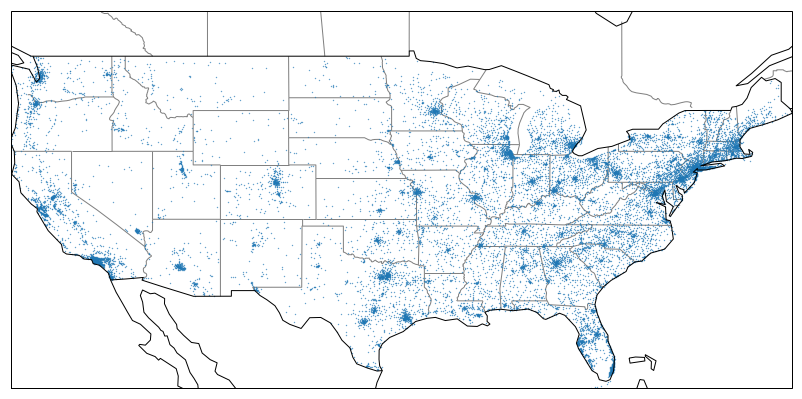

In [52]:
import matplotlib.pyplot as plt
import cartopy.feature
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader

plt.figure(figsize=(14, 10))

BBox = (continental_us_complaints.Longitude.min(), continental_us_complaints.Longitude.max(), continental_us_complaints.Latitude.min(), continental_us_complaints.Latitude.max())

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent(BBox)
#ax.set_global()
# Scatter plot the Long and Lat of complaints
plt.scatter(continental_us_complaints['Longitude'].values, continental_us_complaints['Latitude'].values, 0.1)

states_provinces = cfeature.NaturalEarthFeature(
     category='cultural',
     name='admin_1_states_provinces_lines',
     scale='50m',
     facecolor='none')
populated_places = cfeature.NaturalEarthFeature(
    category='cultural',
    name='populated_places',
    scale='50m',
    facecolor='black')

populated_places = shpreader.Reader('C:\\Work\\LYIT\\Big_Data_Analytics\\Data\\ne_50m_populated_places.shp')


ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(states_provinces, zorder=0, edgecolor='grey')

plt.show()
